### Data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data=pd.read_csv('survey_results_public.csv')
pd.set_option("display.max_columns",None)

In [10]:
data.head(2)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0


In [12]:
data=data[['Country',"EdLevel","YearsCode","Employment","ConvertedCompYearly"]]
data=data.rename({"ConvertedCompYearly":"Salary"},axis=1)
data.head()

,Country,EdLevel,YearsCode,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,"Employed, full-time;Independent contractor, fr...",23456.0


In [13]:
data=data[data["Salary"].notnull()]
data.head()

,Country,EdLevel,YearsCode,Employment,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,"Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48019 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     48019 non-null  object 
 1   EdLevel     48019 non-null  object 
 2   YearsCode   47950 non-null  object 
 3   Employment  48007 non-null  object 
 4   Salary      48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [16]:
data=data.dropna()
data.isnull().sum()

Country       0
EdLevel       0
YearsCode     0
Employment    0
Salary        0
dtype: int64

In [18]:
data.shape

(47938, 5)

In [19]:
data["Employment"].value_counts()

Employment
Employed, full-time                                                                             39241
Independent contractor, freelancer, or self-employed                                             3899
Employed, full-time;Independent contractor, freelancer, or self-employed                         3289
Employed, part-time                                                                               906
Independent contractor, freelancer, or self-employed;Employed, part-time                          240
Employed, full-time;Employed, part-time                                                           154
Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time      109
I prefer not to say                                                                                34
Retired                                                                                            33
Independent contractor, freelancer, or self-employed;Retired           

In [20]:
data=data[data['Employment']=="Employed, full-time"]
data=data.drop("Employment",axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39241 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     39241 non-null  object 
 1   EdLevel     39241 non-null  object 
 2   YearsCode   39241 non-null  object 
 3   Employment  39241 non-null  object 
 4   Salary      39241 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.8+ MB


In [21]:
data['Country'].value_counts()

Country
United States of America                                10589
Germany                                                  3212
United Kingdom of Great Britain and Northern Ireland     3083
Canada                                                   1812
India                                                    1609
                                                        ...  
Saint Lucia                                                 1
Mauritania                                                  1
Botswana                                                    1
Sierra Leone                                                1
Antigua and Barbuda                                         1
Name: count, Length: 165, dtype: int64

In [22]:
def shrten(categories,cutoff):
    cat_map={}
    for i in range(len(categories)):
        if categories.values[i]>=cutoff:
            cat_map[categories.index[i]]=categories.index[i]
        else:
             cat_map[categories.index[i]]="Others"
    return cat_map

In [23]:
country_map=shrten(data.Country.value_counts(),400)
data["Country"]=data["Country"].map(country_map)
data.Country.value_counts()

Country
United States of America                                10589
Others                                                   9296
Germany                                                  3212
United Kingdom of Great Britain and Northern Ireland     3083
Canada                                                   1812
India                                                    1609
France                                                   1464
Netherlands                                              1004
Australia                                                 988
Brazil                                                    971
Spain                                                     970
Sweden                                                    882
Italy                                                     825
Poland                                                    741
Switzerland                                               511
Denmark                                                   440


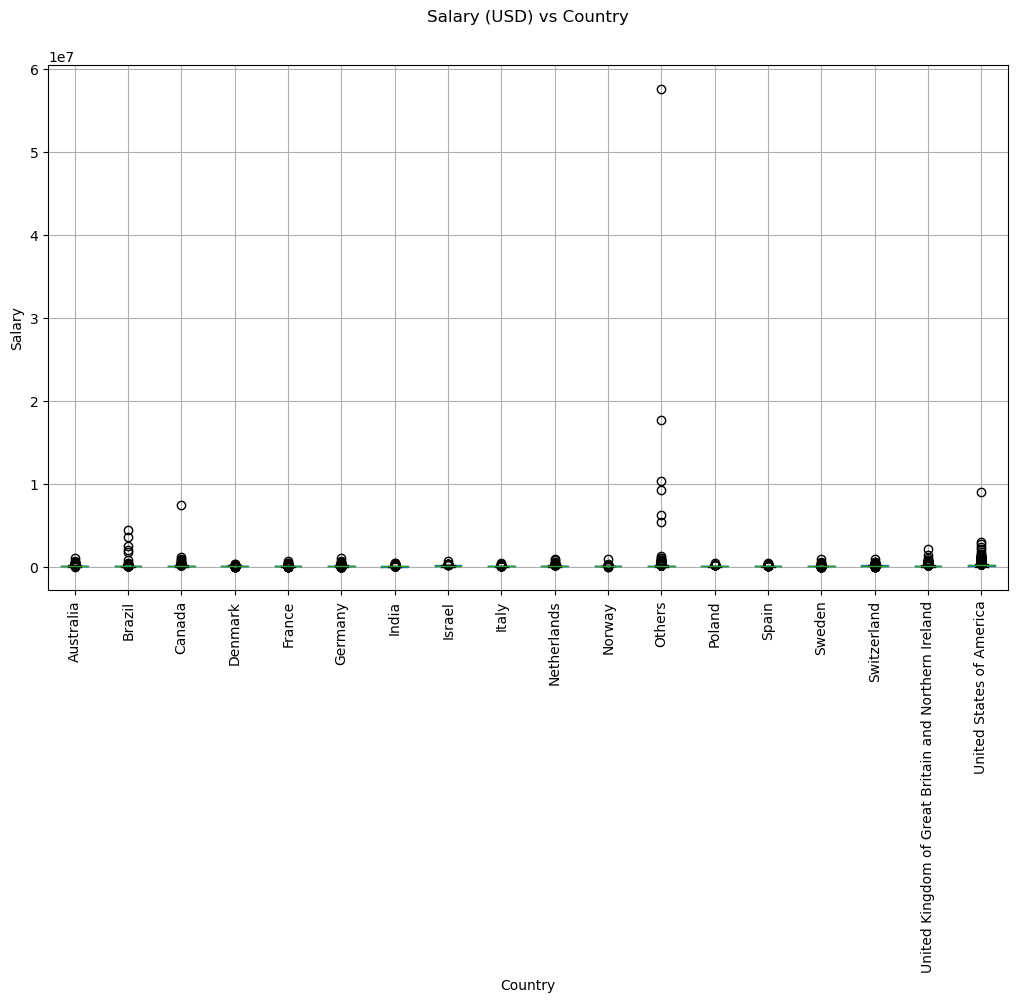

In [25]:
fig,ax=plt.subplots(1,1,figsize=(12,7))
data.boxplot('Salary','Country',ax=ax)
plt.suptitle('Salary (USD) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [26]:
data=data[data['Salary']<=500000]
data=data[data['Salary']>=100000]
data=data[data['Country']!='Others']

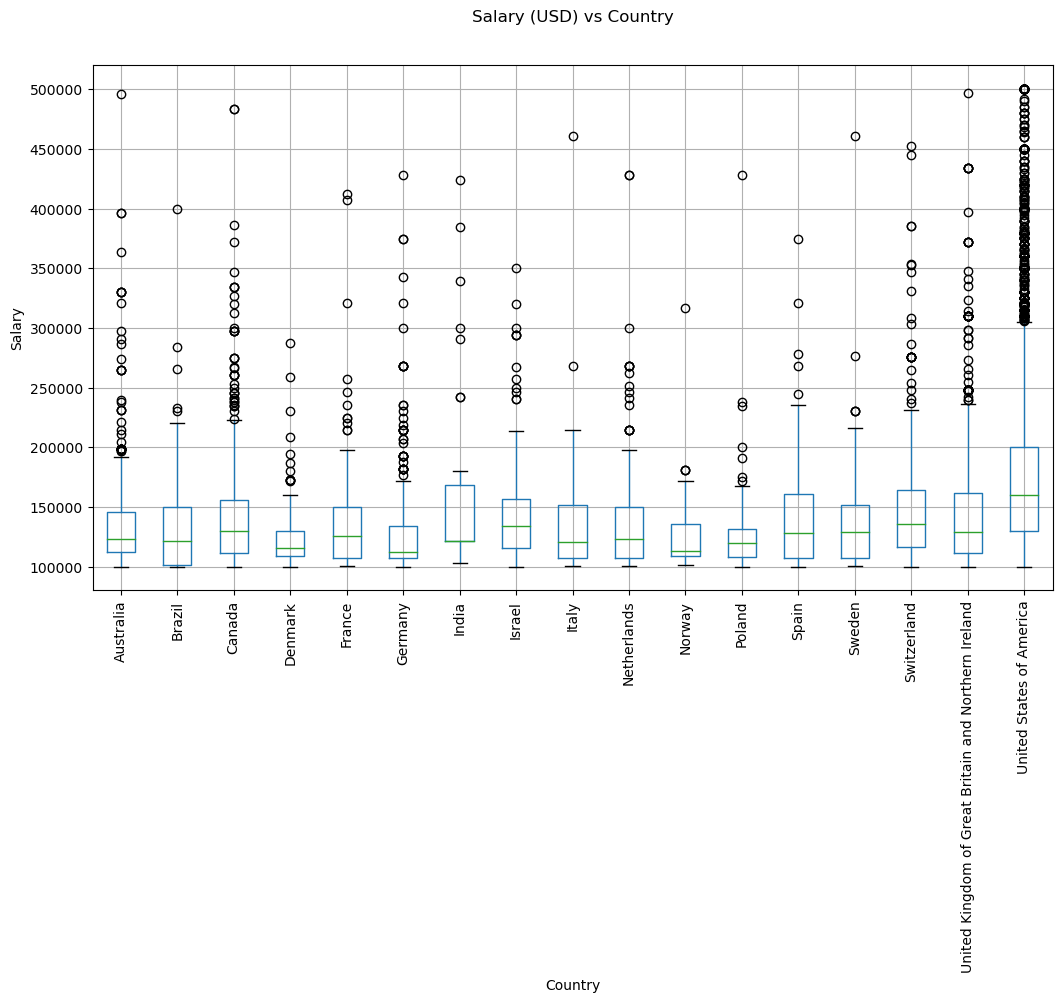

In [27]:
fig,ax=plt.subplots(1,1,figsize=(12,7))
data.boxplot('Salary','Country',ax=ax)
plt.suptitle('Salary (USD) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [28]:
data['YearsCode'].unique()

array(['18', '27', '12', '4', '5', '15', '24', '33', '6', '11', '21',
       '13', '32', '29', '20', '14', '8', '30', '40', '23', '35', '10',
       '45', '25', '41', '16', '22', '17', '26', '7', '43', '9', '31',
       '42', '28', '44', '37', '2', '19', '3', '38', '34', '36', '48',
       'More than 50 years', '49', '47', '50', '39', '46', '1',
       'Less than 1 year'], dtype=object)

In [29]:
def clean(x):
    if x=='More than 50 years':
        return 50
    if x=='Less than 1 year':
        return 0.5
    return float(x)

In [30]:
data['YearsCode']=data['YearsCode'].apply(clean)
data['YearsCode'].unique()

array([18. , 27. , 12. ,  4. ,  5. , 15. , 24. , 33. ,  6. , 11. , 21. ,
       13. , 32. , 29. , 20. , 14. ,  8. , 30. , 40. , 23. , 35. , 10. ,
       45. , 25. , 41. , 16. , 22. , 17. , 26. ,  7. , 43. ,  9. , 31. ,
       42. , 28. , 44. , 37. ,  2. , 19. ,  3. , 38. , 34. , 36. , 48. ,
       50. , 49. , 47. , 39. , 46. ,  1. ,  0.5])

In [31]:
data['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Something else',
       'Primary/elementary school'], dtype=object)

In [32]:
def clean_edu(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x: 
        return 'Pstgrad'
    return 'Less than a Bachelors'
    
data['EdLevel']=data['EdLevel'].apply(clean_edu)

In [33]:
data['EdLevel'].unique()

array(['Bachelor’s degree', 'Less than a Bachelors', 'Master’s degree',
       'Pstgrad'], dtype=object)

In [34]:
from sklearn.preprocessing import LabelEncoder
le_education=LabelEncoder()

data['EdLevel']=le_education.fit_transform(data['EdLevel'])
data['EdLevel'].unique()

array([0, 1, 2, 3])

In [35]:
le_country=LabelEncoder()
data['Country']=le_country.fit_transform(data['Country'])
data['Country'].unique()

array([16,  9,  5,  0, 15,  2, 14,  8, 10,  3,  7, 13,  4, 11,  1, 12,  6])

In [39]:
data=data.drop('Employment',axis=1)

In [41]:
X=data.drop('Salary',axis=1)
y=data['Salary']

In [42]:
from sklearn.linear_model import LinearRegression

linear_reg=LinearRegression()
linear_reg.fit(X,y.values)

LinearRegression()

In [44]:
y_pred=linear_reg.predict(X)

In [51]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

error=np.sqrt(mean_squared_error(y,y_pred))

In [46]:
error

65170.5834493518

In [52]:
from  sklearn.tree import DecisionTreeRegressor

tree=DecisionTreeRegressor()
tree.fit(X,y.values)

DecisionTreeRegressor()

In [53]:
y_pred=tree.predict(X)

In [54]:
error=np.sqrt(mean_squared_error(y,y_pred))

In [55]:
error

60552.47950262375

In [57]:
X=np.array([['Spain','Master’s degree',10]])
X

array([['Spain', 'Master’s degree', '10']], dtype='<U15')

In [58]:
X[:,0]=le_country.transform(X[:,0])
X[:,1]=le_education.transform(X[:,1])
X.astype(float)
X

array([['12', '2', '10']], dtype='<U15')

In [59]:
X=X.astype(float)
X

array([[12.,  2., 10.]])

In [60]:
y_pred=tree.predict(X)
y_pred

c:\Users\pales\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([112444.])

In [61]:
import pickle


In [63]:
df={"model":tree,"le_country":le_country,"le_education":le_education}
with open('save_steps.pkl','wb') as file:
    pickle.dump(df,file)

In [65]:
with open('save_steps.pkl','rb') as file:
    df=pickle.load(file)

regressor_loaded=df['model']
le_country=df['le_country']
le_education=df['le_education']

In [66]:
y_pred=regressor_loaded.predict(X)
y_pred

c:\Users\pales\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([112444.])